# What Patents Reveal About Facebook?
## Abstract Analysis

In [3]:
import pandas as pd
import re
import time
import datetime
import numpy as np


import matplotlib.pyplot as plt
from cycler import cycler


% matplotlib inline

In [128]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [2]:
years = []
n=2000
for i in range(18):
    n+=1
    years.append(n)


## Glue the documents together for each year

In [25]:
#read in my big table csv
df = pd.read_csv('allpatents.csv', parse_dates = True)
df.head()

,Unnamed: 0,abstract,applicant,assignee,date_filed,date_issued,inventor,p_num,title,type,url
0,0,A social networking system generates socially-...,NaN,"FACEBOOK, INC.","April 13, 2012","July 24, 2018","Timothy Kendall, Matthew R. Cohler, Mark E. Zu...",20120203847,Sponsored stories and news stories within a ne...,Grant,https://patents.justia.com/patent/10032189
1,1,The various embodiments described herein inclu...,NaN,"FACEBOOK, INC.","August 3, 2015","July 24, 2018","Scott Snibbe, Graham McDermott, Justin Ponczek...",20150339295,Methods and systems for storage of media item ...,Grant,https://patents.justia.com/patent/10031921
2,2,"In one embodiment, a method includes deploying...",NaN,"FACEBOOK, INC.","January 26, 2016","July 24, 2018","Michael Dudley Johnson, Mathieu Benjamin Tozer...",20160140600,Native application testing,Grant,https://patents.justia.com/patent/10032186
3,3,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 9, 2015","July 24, 2018","Kittipat Virochsiri, Sriram Sankar",20160034716,User search based on private information,Grant,https://patents.justia.com/patent/10032047
4,4,"In one embodiment, a method includes receiving...",NaN,"FACEBOOK, INC.","October 17, 2012","July 24, 2018","Matthew Nicholas Papakipos, Michael John McKen...",20140108528,Social context in augmented reality,Grant,https://patents.justia.com/patent/10032233


In [26]:
df.dtypes

Unnamed: 0      int64
abstract       object
applicant      object
assignee       object
date_filed     object
date_issued    object
inventor       object
p_num          object
title          object
type           object
url            object
dtype: object

In [29]:
# Make a new column that is filed_date as a datetime
# usually with .groupby you give it a column name, but you can also give it a list of values
#      you're going to use .dt.year to pull the year out of each of those filing dates
# so it will then be grouped by year
# you then pull out the .abstract column
# and use .apply to do something to each group of abstracts
# ' '.join(abstracts) will take the list of abtracts and join them all together with spaces, making a new string
# the end!
# probably you want to .reset_index() to turn it into a dataframe

df.groupby(pd.to_datetime(df.date_filed).dt.year).abstract.apply(lambda abstracts: ' '.join(abstracts))

date_filed
2001    A digital audio playback device that includes ...
2002    A process, system and computer software are ro...
2003    Linking multiple identities from a single serv...
2004    An Internet/world-wide-web based keyword bid m...
2005    Systems and techniques for transferring electr...
2006    Content maintained in an online social network...
2007    An iterative language translation system. The ...
2008    Embodiments of the invention provide technique...
2009    To avoid the need to operate in-chassis fans t...
2010    A method and apparatus for fine-grained, trust...
2011    A wireless communication system and in particu...
2012    A social networking system generates socially-...
2013    In one embodiment, a method includes receiving...
2014    A server system receives a first request for a...
2015    The various embodiments described herein inclu...
2016    In one embodiment, a method includes deploying...
2017    A tracking system generates a structured light...
201

In [31]:
df_abstract = df.groupby(pd.to_datetime(df.date_filed).dt.year).abstract.apply(lambda abstracts: ' '.join(abstracts)).reset_index()

In [32]:
df_abstract

,date_filed,abstract
0,2001,A digital audio playback device that includes ...
1,2002,"A process, system and computer software are ro..."
2,2003,Linking multiple identities from a single serv...
3,2004,An Internet/world-wide-web based keyword bid m...
4,2005,Systems and techniques for transferring electr...
5,2006,Content maintained in an online social network...
6,2007,An iterative language translation system. The ...
7,2008,Embodiments of the invention provide technique...
8,2009,To avoid the need to operate in-chassis fans t...
9,2010,"A method and apparatus for fine-grained, trust..."


## Analyzing the abstract of the patents

### 1.Tokenizing (or phrasing?)

In [17]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import math

In [18]:
def tokenize(s):
    blob = TextBlob(s.lower())
    words = [token for token in blob.words if len(token)>=2]
    return words

In [19]:
def phrase(s):
    blob = TextBlob(s.lower())
    phrase = [phrase for phrase in blob.noun_phrases]
    return phrase

In [19]:
df_abstract.abstract.apply(tokenize)

0     [digital, audio, playback, device, that, inclu...
1     [process, system, and, computer, software, are...
2     [linking, multiple, identities, from, single, ...
3     [an, internet/world-wide-web, based, keyword, ...
4     [systems, and, techniques, for, transferring, ...
5     [content, maintained, in, an, online, social, ...
6     [an, iterative, language, translation, system,...
7     [embodiments, of, the, invention, provide, tec...
8     [to, avoid, the, need, to, operate, in-chassis...
9     [method, and, apparatus, for, fine-grained, tr...
10    [wireless, communication, system, and, in, par...
11    [social, networking, system, generates, social...
12    [in, one, embodiment, method, includes, receiv...
13    [server, system, receives, first, request, for...
14    [the, various, embodiments, described, herein,...
15    [in, one, embodiment, method, includes, deploy...
16    [tracking, system, generates, structured, ligh...
17    [in, one, embodiment, method, includes, st

### 2. Counting and TF-IDF on abstarct analysis

In [20]:
def print_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    print('\n'.join([str(x) for x in sorted_list]))

In [21]:
def return_sorted_vector(v):
    sorted_list = sorted(v.items(), key=lambda x: (x[1],x[0]), reverse=True) 
    sorted_list = sorted_list[:20]
    return sorted_list

***Counting-term frequency***

In [34]:
# Count Vectorizer with stop words
vectorizer = CountVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df_abstract.abstract)

#convert matrix to a dataframe
results = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
results.head()



,'s,100,144th,145th,27,289th,290th,30,300,3d,...,zeros,zfp,zone,zones,zones—areas,zookeeper,zoom,zooming,˜10,—are
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
big_list = []
for i in range(0,18):
    year = return_sorted_vector(results.iloc[i,:])
    big_list.append(year)

In [36]:
df_counting=pd.DataFrame(big_list).T
df_counting

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,"(digital, 9)","(multidimensional, 7)","(user, 12)","(message, 10)","(instant, 6)","(content, 20)","(social, 35)","(social, 60)","(user, 60)","(user, 413)","(user, 524)","(user, 1627)","(user, 1324)","(user, 1110)","(user, 689)","(user, 482)","(user, 149)","(access, 13)"
1,"(audio, 7)","(data, 4)","(list, 8)","(members, 9)","(network, 5)","(social, 19)","(user, 34)","(user, 56)","(social, 56)","(social, 195)","(social, 351)","(information, 635)","(social, 674)","(social, 596)","(device, 387)","(device, 274)","(device, 116)","(content, 10)"
2,"(playback, 5)","(space, 3)","(identity, 8)","(member, 9)","(messaging, 5)","(user, 17)","(network, 33)","(website, 31)","(document, 51)","(users, 133)","(networking, 235)","(social, 619)","(device, 574)","(device, 541)","(data, 302)","(social, 243)","(network, 92)","(device, 7)"
3,"(device, 4)","(retrieved, 3)","(account, 8)","(individual, 9)","(users, 4)","(network, 17)","(time, 15)","(network, 30)","(information, 42)","(networking, 129)","(information, 219)","(device, 591)","(data, 486)","(information, 442)","(social, 267)","(content, 193)","(based, 84)","(associated, 7)"
4,"(computing, 4)","(recommendation, 3)","(wallet, 6)","(reply, 8)","(communications, 4)","(items, 14)","(web-based, 14)","(networking, 28)","(structured, 38)","(second, 108)","(device, 205)","(content, 509)","(associated, 463)","(content, 406)","(second, 264)","(associated, 188)","(request, 66)","(posting, 6)"
5,"(platform, 3)","(information, 3)","(secondary, 4)","(social, 7)","(message, 3)","(associated, 14)","(method, 13)","(member, 28)","(application, 36)","(information, 104)","(users, 197)","(based, 481)","(content, 461)","(based, 401)","(associated, 262)","(based, 185)","(associated, 64)","(code, 6)"
6,"(wireless, 2)","(recommendation-specific, 2)","(primary, 4)","(original, 7)","(mail, 3)","(method, 13)","(users, 11)","(content, 28)","(data, 34)","(content, 99)","(content, 194)","(associated, 457)","(based, 438)","(associated, 390)","(based, 258)","(second, 150)","(second, 59)","(second, 5)"
7,"(players, 2)","(query, 2)","(identifier, 4)","(network, 7)","(gateway, 3)","(data, 12)","(second, 11)","(based, 28)","(client, 32)","(associated, 90)","(based, 131)","(users, 420)","(networking, 405)","(second, 346)","(content, 194)","(information, 150)","(social, 56)","(messaging, 5)"
8,"(enable, 2)","(cube, 2)","(buddy, 4)","(information, 7)","(e-mail, 3)","(media, 11)","(includes, 10)","(information, 26)","(target, 31)","(based, 88)","(second, 126)","(message, 390)","(includes, 404)","(networking, 342)","(includes, 190)","(data, 143)","(content, 51)","(user, 4)"
9,"(content, 2)","(based, 2)","(associated, 4)","(based, 7)","(configuring, 3)","(member, 10)","(trust, 9)","(associated, 23)","(resources, 31)","(web, 65)","(associated, 121)","(networking, 385)","(information, 392)","(data, 339)","(media, 179)","(networking, 139)","(data, 49)","(location, 4)"


***tf-idf***

In [33]:
df_abstract

,date_filed,abstract
0,2001,A digital audio playback device that includes ...
1,2002,"A process, system and computer software are ro..."
2,2003,Linking multiple identities from a single serv...
3,2004,An Internet/world-wide-web based keyword bid m...
4,2005,Systems and techniques for transferring electr...
5,2006,Content maintained in an online social network...
6,2007,An iterative language translation system. The ...
7,2008,Embodiments of the invention provide technique...
8,2009,To avoid the need to operate in-chassis fans t...
9,2010,"A method and apparatus for fine-grained, trust..."


In [34]:
#remove puctuation
df_abstract.abstract = df_abstract.abstract.str.replace('[^\w\s]','')

In [35]:
#lemnization
from textblob import Word
df_abstract.abstract = df_abstract.abstract.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [36]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=tokenize)

matrix = vectorizer.fit_transform(df_abstract.abstract)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())
tfidf.shape

(18, 5252)

In [27]:
big_list = []
for i in range(0,18):
    year = return_sorted_vector(tfidf.iloc[i,:])
    big_list.append(year)

In [32]:
df_tfidf=pd.DataFrame(big_list).T
df_tfidf.columns = years
df_tfidf

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"(digital, 0.5093593752472022)","(multidimensional, 0.7042078623671597)","(wallet, 0.34117465799583585)","(reply, 0.2678499950035751)","(instant, 0.4256768367266237)","(social, 0.2749502329564752)","(social, 0.38959948945428985)","(social, 0.37061557028094705)","(document, 0.29145670724458134)","(user, 0.5867473358014293)","(user, 0.47197511353743693)","(user, 0.5228683147190759)","(user, 0.47704032230985316)","(user, 0.45533349290928765)","(user, 0.4342410011679197)","(user, 0.4358201798856833)","(user, 0.333753568422941)","(access, 0.4219901721360733)"
1,"(audio, 0.4715154226323161)","(440, 0.22986895714175268)","(user, 0.29640390409549355)","(individual, 0.24987805889668013)","(mail, 0.2962560322426169)","(content, 0.25981552778906875)","(network, 0.3479219477218573)","(user, 0.29445923938657825)","(social, 0.23910199926170003)","(social, 0.3254400047831769)","(social, 0.37138997853843064)","(social, 0.23368491183785312)","(social, 0.28527404016289354)","(social, 0.28720244274516166)","(device, 0.257212717768784)","(device, 0.2612646956731295)","(device, 0.27401069011386664)","(content, 0.34231730332685345)"
2,"(playback, 0.40996216616082126)","(410, 0.22986895714175268)","(identity, 0.2750126094636282)","(members, 0.22288680722075824)","(configuring, 0.2962560322426169)","(items, 0.24002319994441185)","(user, 0.3221766045796355)","(networking, 0.2049062175433301)","(user, 0.2180776603945611)","(networking, 0.2550649191833866)","(networking, 0.2945883861262219)","(information, 0.20406968644536766)","(device, 0.21809658479752173)","(device, 0.2340311954547239)","(data, 0.20071896838804335)","(social, 0.2581082121559337)","(network, 0.22928744749654564)","(posting, 0.28776799328197306)"
3,"(computing, 0.2395173995265161)","(400, 0.22986895714175268)","(accountholder, 0.25302816241551557)","(message, 0.22196191893518288)","(network, 0.2835904679164947)","(network, 0.23300592449632643)","(web-based, 0.19600871087202348)","(website, 0.2023555119383207)","(structured, 0.18140739757623706)","(users, 0.1992611275520081)","(information, 0.1972567745509517)","(device, 0.20029131628091607)","(networking, 0.20308697658018432)","(networking, 0.19525073184324057)","(social, 0.1976778998095072)","(associated, 0.18913458443253464)","(based, 0.19842153422038616)","(code, 0.25581246485614295)"
4,"(platform, 0.2020780382709926)","(recommendation-specific, 0.20120224639061707)","(account, 0.24530638159848356)","(original, 0.21956729777184505)","(messaging, 0.2835904679164947)","(user, 0.20941807385073521)","(time, 0.1669712097661242)","(network, 0.1755137787591796)","(client, 0.16187129959397323)","(second, 0.17071733913073311)","(device, 0.1947204397048069)","(content, 0.17250131977493446)","(associated, 0.18560979821022766)","(information, 0.1813129764557704)","(second, 0.18512639117192733)","(content, 0.1840295119157445)","(request, 0.17366761356829963)","(associated, 0.25281906874037885)"
5,"(device, 0.1923071661544377)","(cube, 0.20120224639061707)","(list, 0.23212820453169042)","(indicator, 0.21527077989495003)","(communications, 0.25313080432046337)","(associated, 0.1918872319381512)","(trust, 0.15337894935057372)","(member, 0.17295393279777532)","(target, 0.15681282148166156)","(content, 0.14832219268908872)","(users, 0.18712159327730227)","(networking, 0.17219694716337583)","(data, 0.18466017458466125)","(associated, 0.17800164996757553)","(associated, 0.18372391851153397)","(based, 0.17640134561871879)","(associated, 0.15950431130194478)","(device, 0.23962211232879743)"
6,"(players, 0.1766333598290466)","(recommendation, 0.19778523856771174)","(secondary, 0.17769320918446327)","(member, 0.210913038775488)","(gateway, 0.24045511827173666)","(media, 0.1885896570991807)","(method, 0.13706016122376197)","(applications, 0.15884606564406129)","(resources, 0.15681282148166156)","(information, 0.14775235574660692)","(content, 0.18427202586698802)","(

## HMMMM,let's try tokenize by noun phrase

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', tokenizer=phrase)

matrix = vectorizer.fit_transform(df_abstract.abstract)

# The easiest way to see what happenned is to make a dataframe
tfidf = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names())


In [27]:

big_list = []
for i in range(0,18):
    content = return_sorted_vector(tfidf.iloc[i,:])
    big_list.append(content)

In [28]:
df_tfidf=pd.DataFrame(big_list).T
df_tfidf.columns = years

# df_tfidf.to_csv('abs_tfidf_lem.csv',index=False)

In [ ]:
# This makes lots of sense...

In [43]:
## Cleanup the table a little to show only the key phrases for each year

In [23]:


big_list = []
for i in range(0,18):
    content = return_sorted_vector(tfidf.iloc[i,:])
    words=[]
    for n in range(len(content)):
        if content[n][1] != 0:
            words.append(content[n][0])
        else:
            words.append('None')
      
    big_list.append(words)



In [25]:
df_tfidf=pd.DataFrame(big_list).T
df_tfidf.columns = years
df_tfidf.to_csv('abs_tfidf_words_only_lem.csv',index=False)

In [26]:
df_tfidf

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,digital audio playback device,multidimensional space,secondary identity,original message,communication system,product category,social network,top term,browser application,web page,mobile device,electronic message,character stream,mobile device,client device,client device,network request,access code
1,wireless communication link,recommendationspecific query,primary identity,reply message,email message,news item,digital file,social network,abstract phrase,threshold degree,anchor term,mobile device,social graph,content item,content item,mobile device,rewrite rule,access device
2,user request copy,multidimensional data,user identifier,social network,host system,medium content,travel time,demographic information,executable code segment,candidate user,map view,instant message,interactive element,social network,social graph,target word,natural language user request,remote web browser
3,mobile digital audio player,multidimensional cube,common graphical user interface,mobile telephone,delivers email message,social network environment,trust value,text phrase,data center,particular embodiment access,particular embodiment,content item,content item,future activity,mobile device,social graph,network resource,user identifier
4,enable wireless communication,variable information,secondlevel password,reply source indicator,certain user,real life friend,multiple identity,external system,text phrase,search query,timeline unit,geographic location,electronic message,online system,medium item,content identifier,object graph,present geographic location
5,digital playback device andor,process system,onetime challenge,destination indicator,particular moment,privacy summary,master keywords,picture file,text value,user comment,social network,user profile,social network,client device,online system,user profile,mobile device,content creation event
6,digital audio content,computer software,additional service,memory device,electronic data,social network,data unit,thirdparty application server,response phase,user node,multimedia content,visible portion,digital file,social graph,social network,content item,source video,access device techniques
7,addition digital content,retrieve data,account holder,cpuintensive computational task,instant message,digital medium,temporal period,calendar entry,social network,access code,content object,input tool,medium item,timeline unit,computerreadable medium,computer system,bit rate,geographic location
8,digital audio player,None,multiple identity,visibility preference,various type,central computer,gift account,authentication code,social captcha,social network,content item,social graph,noncompletion character,computerreadable medium,user account,online system,antenna element,retrieve message data
9,None,None,secondary identity interacts,contactability preference,None,data item,trust level,user profile,response portion,participant list,search result,user interface,user interface,medium content item,medium presentation system,machine translation system,network access component,message experience


In [40]:
#this is my final keyphrase table

In [ ]:
**Facebook first came up with the idea of tracking you down location: 

In [ ]:
**mimic human...in 2004**

In [ ]:
identity

In [ ]:
digital/audio

In [41]:
df[df.abstract.str.contains('mimic')]

,abstract,applicant,assignee,date_filed,date_issued,inventor,p_num,title,type,url,filed_date
475,"An audio system, such as an audio system inclu...",NaN,"FACEBOOK, INC.","December 28, 2015","October 17, 2017",Ian Werris,9794691,Using bone transducers to imply positioning of...,Grant,https://patents.justia.com/patent/9794691,2015-12-28
669,An Internet/world-wide-web based keyword bid m...,NaN,"FACEBOOK, INC.","April 12, 2004","July 25, 2017","David Gilbert Carlson, Frank Wouter Watervoort",9715692,System for managing bids for pay-per-click sea...,Grant,https://patents.justia.com/patent/9715692,2004-04-12


In [4]:
df_ab = pd.read_csv('abs_tfidf_lem.csv')

In [61]:
df_ab

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"('digital audio playback device', 0.7888921915...","('multidimensional space', 0.6039602213046114)","('secondary identity', 0.3881348214755121)","('original message', 0.4893404735101178)","('communication system', 0.6446607729467028)","('product category', 0.3474431210045522)","('social network', 0.3835915821695907)","('top term', 0.49038299201579144)","('browser application', 0.25526495411074274)","('web page', 0.40654543363180334)","('mobile device', 0.315321950032366)","('electronic message', 0.29977677180642387)","('character stream', 0.2084627844761347)","('mobile device', 0.34957151223339766)","('client device', 0.3183485925655776)","('client device', 0.2863020214091918)","('network request', 0.40001325498078666)","('access code', 0.683236561047216)"
1,"('wireless communication link', 0.225322814021...","('recommendationspecific query', 0.40264014753...","('primary identity', 0.3881348214755121)","('reply message', 0.29360428410607065)","('email message', 0.4035618393502102)","('news item', 0.34209253608442897)","('digital file', 0.3006883823723079)","('social network', 0.28117355194481464)","('abstract phrase', 0.24232485703555917)","('threshold degree', 0.20892143940120375)","('anchor term', 0.27911574784862686)","('mobile device', 0.22734209249962897)","('social graph', 0.19642773317681456)","('content item', 0.30732949064390735)","('content item', 0.22673784767982383)","('mobile device', 0.2697845970971231)","('rewrite rule', 0.2560084831877035)","('access device', 0.4448106502026524)"
2,"('user request copy', 0.22532281402140755)","('multidimensional data', 0.40264014753640753)","('user identifier', 0.32667049718080693)","('social network', 0.2693527655646261)","('host system', 0.37205092320492167)","('medium content', 0.34130405866968233)","('travel time', 0.29520093099907574)","('demographic information', 0.24519149600789572)","('executable code segment', 0.22148047817774646)","('candidate user', 0.17605233452410576)","('map view', 0.18323064204198805)","('instant message', 0.19518983185255231)","('interactive element', 0.18530025286767532)","('social network', 0.2581780947876357)","('social graph', 0.1957619585182088)","('target word', 0.1620476946331497)","('natural language user request', 0.2560084831...","('remote web browser', 0.2533571698326189)"
3,"('mobile digital audio player', 0.225322814021...","('multidimensional cube', 0.40264014753640753)","('common graphical user interface', 0.25875654...","('mobile telephone', 0.20618846129641522)","('delivers email message', 0.24592431028235504)","('social network environment', 0.2559780440022...","('trust value', 0.2505736519769232)","('text phrase', 0.2011796454941115)","('data center', 0.22122962689597706)","('particular embodiment access', 0.14943745689...","('particular embodiment', 0.17618661430727153)","('content item', 0.16917245275486606)","('content item', 0.17101048787770978)","('future activity', 0.22614387400035657)","('mobile device', 0.18133780589178472)","('social graph', 0.14306483870412975)","('network resource', 0.23012881481064615)","('user identifier', 0.21925550944556124)"
4,"('enable wireless communication', 0.2253228140...","('variable information', 0.20132007376820377)","('secondlevel password', 0.22648729651400584)","('reply source indicator', 0.1957361894040471)","('certain user', 0.24592431028235504)","('real life friend', 0.23816748368605703)","('multiple identity', 0.2004589215815386)","('external system', 0.2008561841076829)","('text phrase', 0.19882756794817694)","('search query', 0.1428922293988638)","('timeline unit', 0.16470802047290048)","('geographic location', 0.15297785663526436)","('electronic message', 0.16958546251517326)","('online system', 0.16969644955860444)","('medium item', 0.17980162332097893)","('content identifier', 0.13660771413676973)","('object graph', 0.19200636239077762)","('present geographic location', 0.2078795816

In [60]:
df_ab['2004'].reset_index()['2004']

0              ('original message', 0.4893404735101178)
1                ('reply message', 0.29360428410607065)
2                ('social network', 0.2693527655646261)
3             ('mobile telephone', 0.20618846129641522)
4        ('reply source indicator', 0.1957361894040471)
5         ('destination indicator', 0.1957361894040471)
6                ('memory device', 0.16060156178257665)
7     ('cpuintensive computational task', 0.16060156...
8        ('visibility preference', 0.13745897419761013)
9     ('contactability preference', 0.13745897419761...
10        ('personal information', 0.12827467423816216)
11        ('timeofday competitor', 0.11181205612848251)
12               ('software rule', 0.11181205612848251)
13    ('recent internet browser software', 0.1118120...
14           ('personal computer', 0.11181205612848251)
15    ('payperclick search engine ppcses', 0.1118120...
16                 ('mimic human', 0.11181205612848251)
17        ('member search result', 0.11181205612

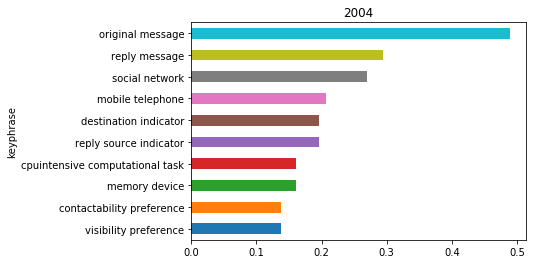

In [110]:
#testing for one year
words = []
freqs = []
years = []
for i in df_ab['2004'].reset_index()['2004']:
    word = re.findall("[('](\w+.*\w)[',]",i)[0]
    freq = float(re.findall("[[',]\s+(\d.*)[)]$",i)[0])
    year = 2004
    if (freq != 0) and len(words)<10 :
        words.append(word)
        freqs.append(freq)
        years.append(year)

df = pd.DataFrame({
        'keyphrase': words,
        'freqs': freqs,
        'year': years,
    })

df = df.sort_values(by='freqs')

df.plot.barh(x='keyphrase',y='freqs',title = year,legend = False)

In [109]:
time = []
for i in range(2004,2019):
    time.append(str(i))
time



['2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

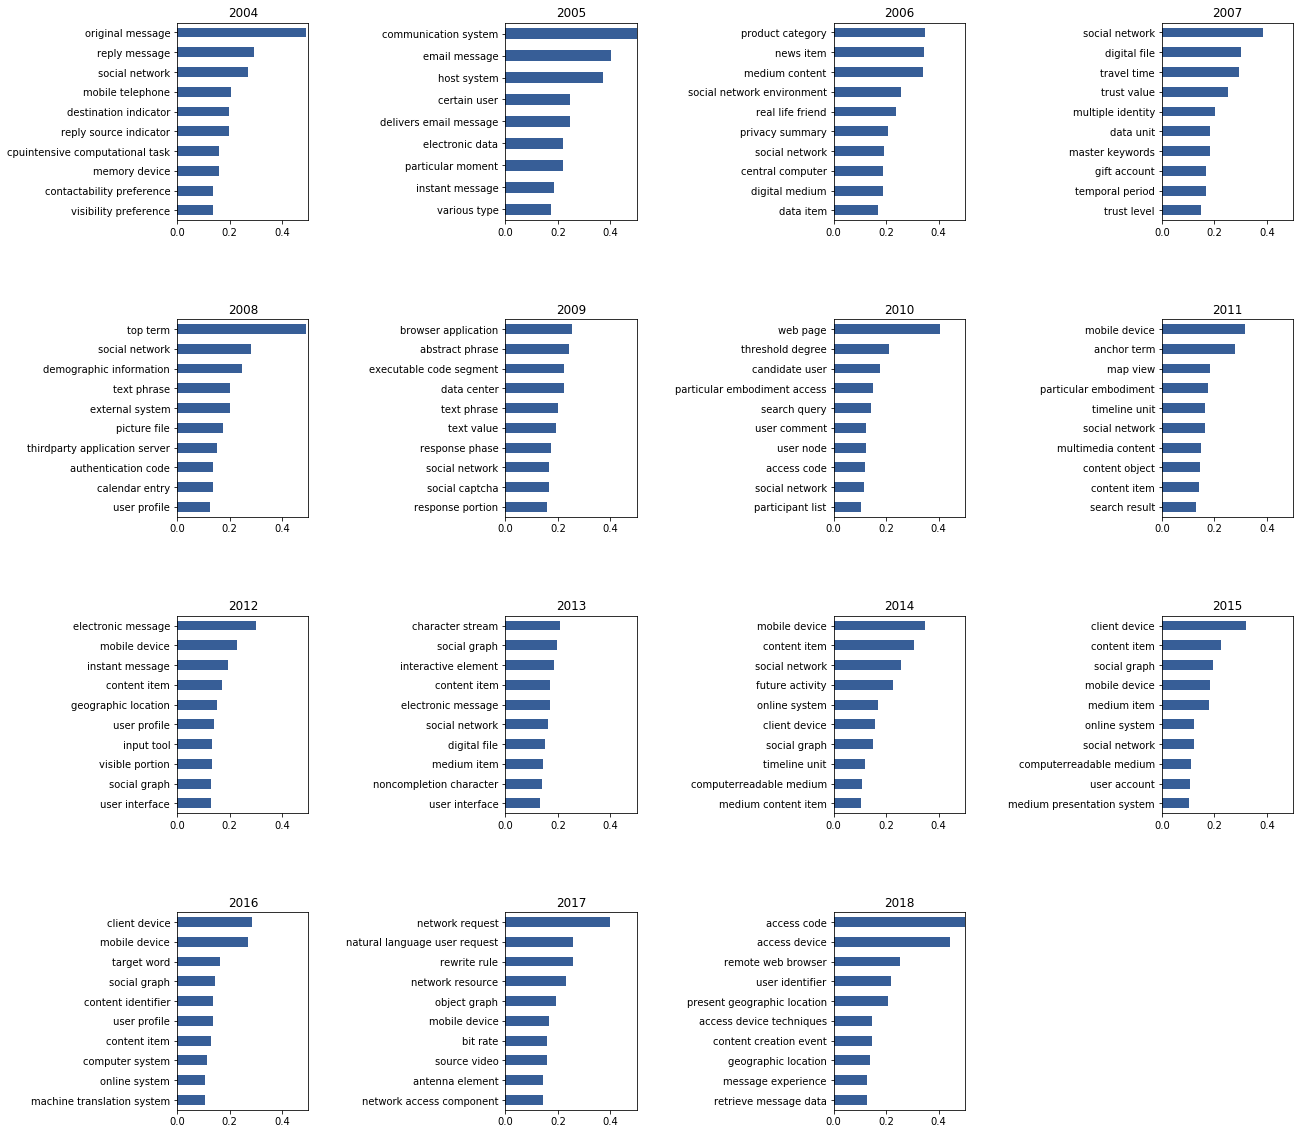

In [155]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=1.5)
for n in time: 
    words = []
    freqs = []
    years = []
    for i in df_ab[n].reset_index()[n]:
        word = re.findall("[('](\w+.*\w)[',]",i)[0]
        freq = float(re.findall("[[',]\s+(\d.*)[)]$",i)[0])
        year = int(n)
        if (freq != 0) and len(words)<10 :
            words.append(word)
            freqs.append(freq)
            years.append(year)

    df = pd.DataFrame({
            'keyphrase': words,
            'freqs': freqs,
            'year': years,
        })

    df = df.sort_values(by='freqs')
    
    ax = fig.add_subplot(4, 4, int(n)-2003)
    df.plot.barh(x='keyphrase',y='freqs',title = year,legend = False,ax=ax,color = '#375e97',figsize=(20,20))
    ax.set_xlim(0,0.5)
    ax.set_ylabel("")
    ax.set_xlabel("")
#     ax = df.plot.barh(x='keyphrase',y='freqs',title = year,legend = False)

plt.savefig('keywords.pdf')
plt.savefig('keywords.png',dpi = 600, bbox_inches='tight')



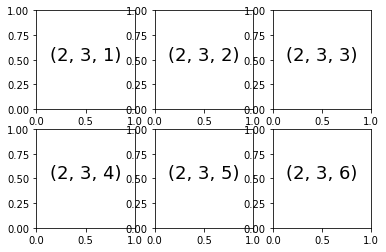

In [121]:
fig = plt.figure()
# fig.subplots_adjust(hspace=0.4, wspace=1)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
#     df.plot.barh(x='keyphrase',y='freqs',title = year,legend = False,ax=ax)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')